In [1]:
import pandas as pd

# URL of the dataset (direct link to the CSV)
url = 'https://data.cityofnewyork.us/api/views/vfnx-vebw/rows.csv?accessType=DOWNLOAD'

# Load the dataset directly into a DataFrame named 'df'
df = pd.read_csv(url)



In [ ]:
# Display the first few rows of the DataFrame
print(df.head())
# And the shape
print(df.shape)

In [ ]:
# know the name of the columns so i can infer what they mean
print(df.columns.tolist())

In [ ]:
# which type of variables I'm working with
print(df.dtypes)

In [2]:
# check how many null vlaues each oclumn has
null_counts = df.isnull().sum()

# Display the counts of null values for each column
null_cols=null_counts[null_counts > 0]
print(null_cols)

Age                                  121
Primary Fur Color                     55
Highlight Fur Color                 1086
Color notes                         2841
Location                              64
Above Ground Sighter Measurement     114
Specific Location                   2547
Other Activities                    2586
Other Interactions                  2783
dtype: int64


In [5]:
# I could drop the rows tha thave null values, but to keep as many rows as possible so that i have as many smapels as possible/
# compared to the amounf of features, I choose to drop the columns with null values (except the target - Prim Fur Color)
# It's also make it easier and faster for this toy exmaple to be working with less columns
null_col=[c for c in null_cols.index.tolist() if "Primary" not in c]
print(null_col)
df.drop(columns=null_col, axis=1,inplace=True)
print(df.shape)

['Age', 'Highlight Fur Color', 'Color notes', 'Location', 'Above Ground Sighter Measurement', 'Specific Location', 'Other Activities', 'Other Interactions']
(3023, 23)


In [7]:
# now drop null rows, which should be less as they columns with many null values are gone. Actually the only column with null values is the target
df= df.dropna(inplace=False).reset_index()
print(df.shape)

(2968, 24)


In [9]:
# set Squirrel Id as index?
if df['Unique Squirrel ID'].is_unique:
    # Set 'Unique Squirrel ID' as the index
    df.set_index('Unique Squirrel ID', inplace=True)
    print("Index set to 'Unique Squirrel ID'.")
else:
    print("Warning: 'Unique Squirrel ID' contains duplicate values.")

In [11]:
# (again) which type of variables I'm working with
print(df.dtypes)

index                                           int64
X                                             float64
Y                                             float64
Unique Squirrel ID                             object
Hectare                                        object
Shift                                          object
Date                                            int64
Hectare Squirrel Number                         int64
Primary Fur Color                              object
Combination of Primary and Highlight Color     object
Running                                          bool
Chasing                                          bool
Climbing                                         bool
Eating                                           bool
Foraging                                         bool
Kuks                                             bool
Quaas                                            bool
Moans                                            bool
Tail flags                  

In [13]:
# see some of the vlaues 
pd.set_option('display.max_columns', None)
print(df.head())

   index          X          Y Unique Squirrel ID Hectare Shift      Date  \
0      2 -73.974281  40.775534     11B-PM-1014-08     11B    PM  10142018   
1      3 -73.959641  40.790313     32E-PM-1017-14     32E    PM  10172018   
2      4 -73.970268  40.776213     13E-AM-1017-05     13E    AM  10172018   
3      5 -73.968361  40.772591     11H-AM-1010-03     11H    AM  10102018   
4      6 -73.954120  40.793181     36H-AM-1010-02     36H    AM  10102018   

   Hectare Squirrel Number Primary Fur Color  \
0                        8              Gray   
1                       14              Gray   
2                        5              Gray   
3                        3          Cinnamon   
4                        2              Gray   

  Combination of Primary and Highlight Color  Running  Chasing  Climbing  \
0                                      Gray+    False     True     False   
1                                      Gray+    False    False     False   
2                   

In [15]:
# set Index (columns) as index (of Df)?
if df['index'].is_unique:
    # Set 'Unique Squirrel ID' as the index
    df.set_index('index', inplace=True)
    print("Index set to 'index'.")
else:
    print("Warning: 'index' contains duplicate values.")

Index set to 'index'.


In [17]:
# Combination of Primary and Highlight Color contains information about the target, the column Date was judged unnecessary, 
# if you know the Unique Squirrel ID you already know its primary color cus it's already been identified, 
# Lat/Long is already expressed in the individual columns so i drop them
df.drop(['Combination of Primary and Highlight Color','Date','Unique Squirrel ID','Lat/Long'],axis=1,inplace=True)

In [ ]:
print(df.dtypes)

In [ ]:
print(df)

In [19]:
# 1. Convert boolean columns to integers 
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)
# 2. One-hot encode the 'Shift' column
df['Shift'] = df['Shift'].map({'AM': 1, 'PM': 0})
# 3. Split Hectare into Letters & Numbers and then encode the Letters
df['Hectare_Number'] = df['Hectare'].str.extract(r'(\d+)').astype(int)  # Numeric part
df['Hectare_Letter'] = df['Hectare'].str.extract(r'([A-Z])')  # Letter part
df = pd.get_dummies(df, columns=['Hectare_Letter'], dtype=int, drop_first=True)
df.drop(columns=['Hectare'], inplace=True)
# Display the first few rows to verify changes
print(df)

               X          Y  Shift  Hectare Squirrel Number Primary Fur Color  \
index                                                                           
2     -73.974281  40.775534      0                        8              Gray   
3     -73.959641  40.790313      0                       14              Gray   
4     -73.970268  40.776213      1                        5              Gray   
5     -73.968361  40.772591      1                        3          Cinnamon   
6     -73.954120  40.793181      1                        2              Gray   
...          ...        ...    ...                      ...               ...   
3018  -73.963943  40.790868      1                        4              Gray   
3019  -73.970402  40.782560      0                        5              Gray   
3020  -73.966587  40.783678      0                        7              Gray   
3021  -73.963994  40.789915      0                        2              Gray   
3022  -73.975479  40.769640 

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Primary Fur Color'] = le.fit_transform(df['Primary Fur Color'])

In [22]:
print(df['Primary Fur Color'])
print(df['Primary Fur Color'].value_counts())
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Original label to encoded value mapping:")
print(label_mapping)

index
2       2
3       2
4       2
5       1
6       2
       ..
3018    2
3019    2
3020    2
3021    2
3022    1
Name: Primary Fur Color, Length: 2968, dtype: int64
Primary Fur Color
2    2473
1     392
0     103
Name: count, dtype: int64
Original label to encoded value mapping:
{'Black': 0, 'Cinnamon': 1, 'Gray': 2}


In [25]:
# Scale variables left so they're in the same scale as the others (between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# List of columns to scale
var_scaled = ['Hectare_Number', 'X', 'Y', 'Hectare Squirrel Number']
# Apply scaling and update the DataFrame with the scaled values
df[var_scaled] = scaler.fit_transform(df[var_scaled])
print(df)

              X         Y  Shift  Hectare Squirrel Number  Primary Fur Color  \
index                                                                          
2      0.218770  0.301721      0                 0.318182                  2   
3      0.684458  0.721493      0                 0.590909                  2   
4      0.346439  0.321008      1                 0.181818                  2   
5      0.407078  0.218139      1                 0.090909                  1   
6      0.860087  0.802960      1                 0.045455                  2   
...         ...       ...    ...                      ...                ...   
3018   0.547621  0.737253      1                 0.136364                  2   
3019   0.342178  0.501290      0                 0.181818                  2   
3020   0.463513  0.533030      0                 0.272727                  2   
3021   0.545999  0.710199      0                 0.045455                  2   
3022   0.180653  0.134339      0        

In [27]:
# Import necessary libraries
!pip install imbalanced-learn
!pip install xgboost
!pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Split the data into features (X) and target (y)
X = df.drop(columns=['Primary Fur Color'])  # Features
y = df['Primary Fur Color']  # Target (Label)

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2024-09-22 15:27:21.226741: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Accuracy: 0.8232323232323232


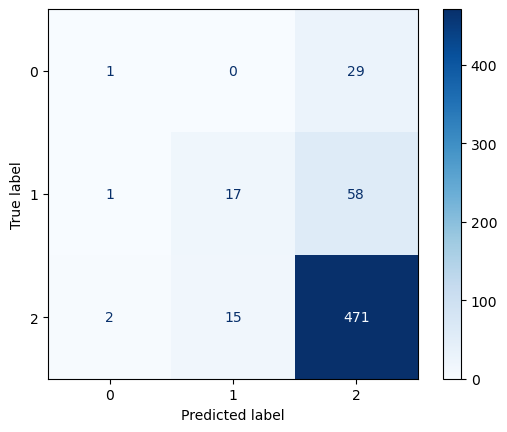

In [28]:
# Initialize the model
classifier = XGBClassifier(random_state=42, eval_metric='mlogloss')

# Train the model
classifier.fit(X_train, y_train)

# Predict on test data
y_pred = classifier.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [29]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)
print('finished')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8243 - loss: 0.6588
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8384 - loss: 0.5107
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8410 - loss: 0.5020
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8342 - loss: 0.5004
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8344 - loss: 0.4974
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8387 - loss: 0.4813
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8457 - loss: 0.4596
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8382 - loss: 0.4660
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8320 - loss: 0.4758
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8434 - loss: 0.4292
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.4253
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8453 - lo

In [33]:
print(model)

<Sequential name=sequential, built=True>


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.7811


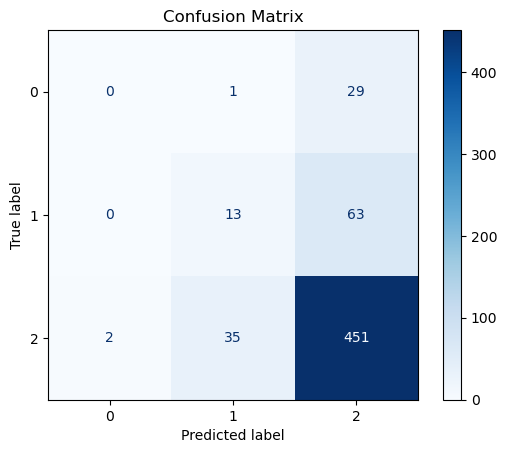

In [43]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique classes from the target variable
classes = np.unique(y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
